### Sobel Operator

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
image = mpimg.imread('sobel_before.jpg')

# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
def abs_sobel_thresh(img, sobel_kernel=3, orient='x', thresh=(0, 255)):

    # 1) Convert to grayscale
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    # 3) Take the absolute value of the derivative or gradient
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    # Use cv2.COLOR_RGB2GRAY if you've read in an image using mpimg.imread(). 
    # Use cv2.COLOR_BGR2GRAY if you've read in an image using cv2.imread().
    if orient=='x':
        sobel=np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)) # (the 1, 0 at the end denotes x direction)
    elif orient=='y':
        sobel=np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
        
    # Note: It's not entirely necessary to convert to 8-bit (range from 0 to 255) but in practice, 
    # it can be useful in the event that you've written a function to apply a particular threshold, 
    # and you want it to work the same on input images of different scales, like jpg vs. png. 
    # You could just as well choose a different standard range of values, like 0 to 1 etc.
    
    abssobel=np.uint8(255*sobel/np.max(sobel))
    mask=np.zeros_like(abssobel)
    mask[(abssobel>=thresh[0])&(abssobel<=thresh[1])]=1
    return mask
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='y', thresh=(20, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Magnitude of the Gradient

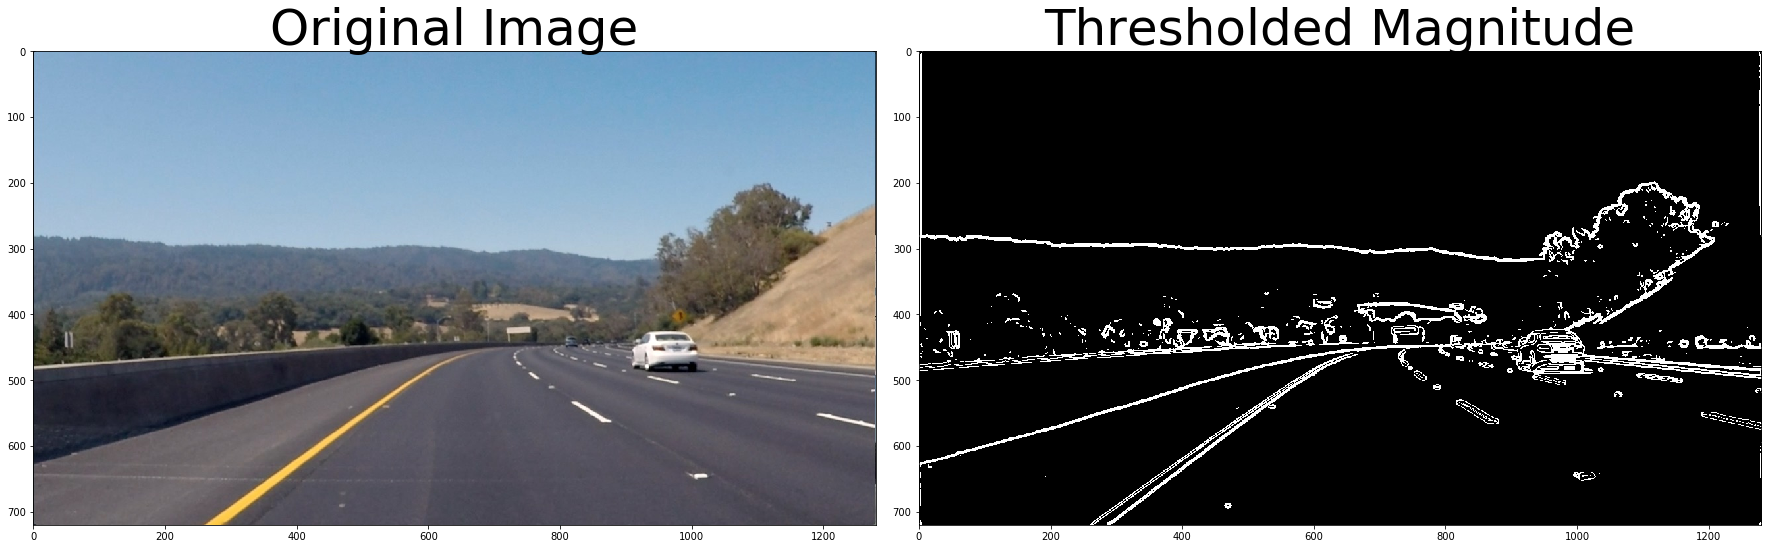

In [2]:

# Read in an image
image = mpimg.imread('sobel_before.jpg')

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Calculate the magnitude 
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    # 5) Create a binary mask where mag thresholds are met
    # 6) Return this mask as your binary_output image
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx=cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely=cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobelxy=np.sqrt(sobelx**2+sobely**2)
    scale_sobel=np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    binary_output=np.zeros_like(scale_sobel)
    binary_output[(scale_sobel<=mag_thresh[1])&(scale_sobel>=mag_thresh[0])]=1# Remove this line
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Direction of the Gradient

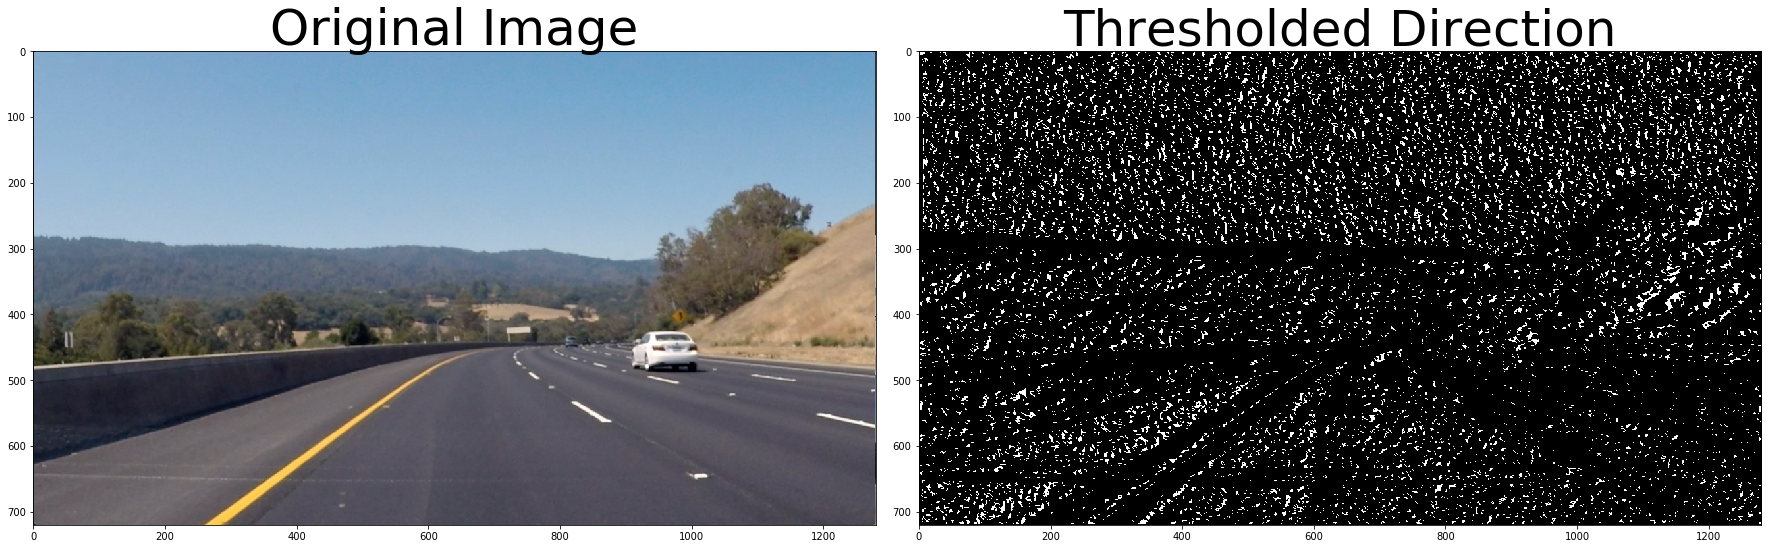

In [3]:
# Read in an image
image = mpimg.imread('sobel_before.jpg')

def dir_thresh(img, sobel_kernel=3, dir_thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Calculate the magnitude 
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    # 5) Create a binary mask where mag thresholds are met
    # 6) Return this mask as your binary_output image
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx=cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely=cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    theta=np.arctan2(sobelx, sobely)
    binary_output=np.zeros_like(theta)
    binary_output[(theta<=dir_thresh[1])&(theta>=dir_thresh[0])]=1# Remove this line
    return binary_output
    
# Run the function
dir_binary = dir_thresh(image, sobel_kernel=15, dir_thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Direction', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Combining Thresholds

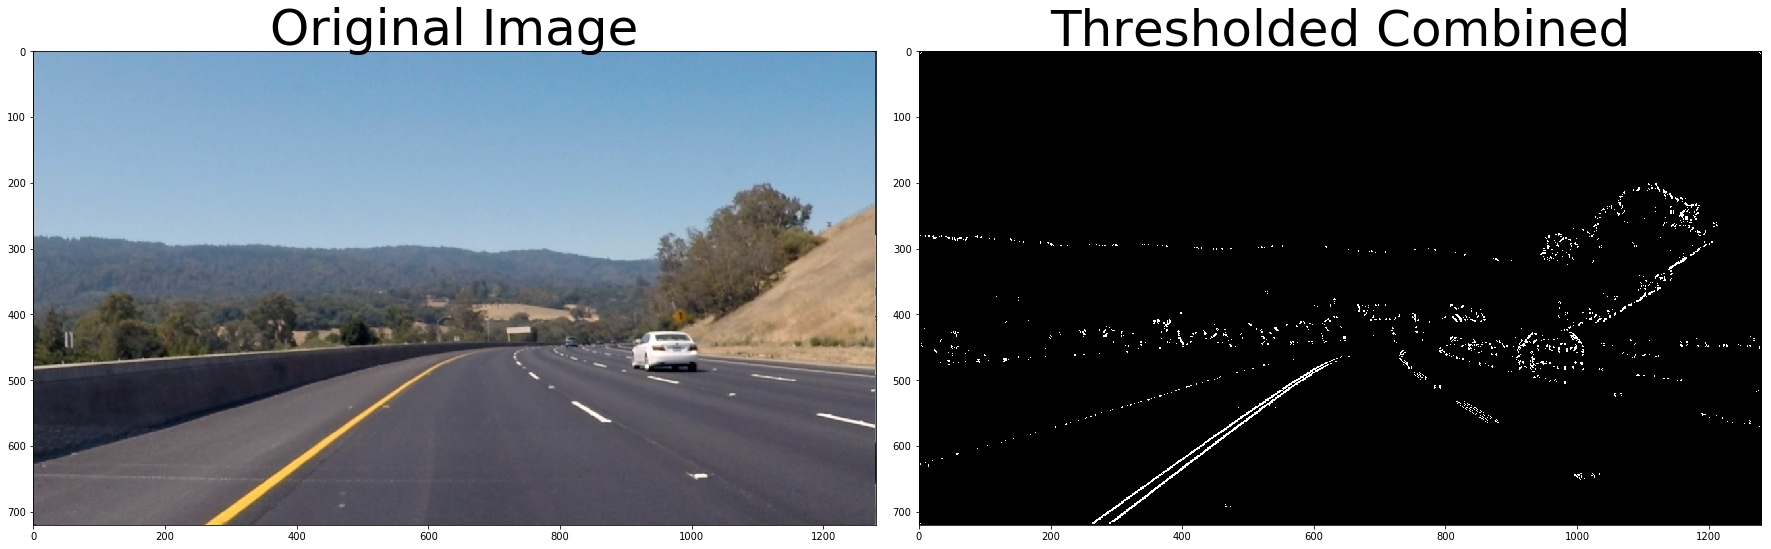

In [4]:
image = mpimg.imread('sobel_before.jpg')
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
dir_binary = dir_thresh(image, sobel_kernel=ksize, dir_thresh=(0.7, 1.3))

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Thresholded Combined', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### HLS Color Threshold

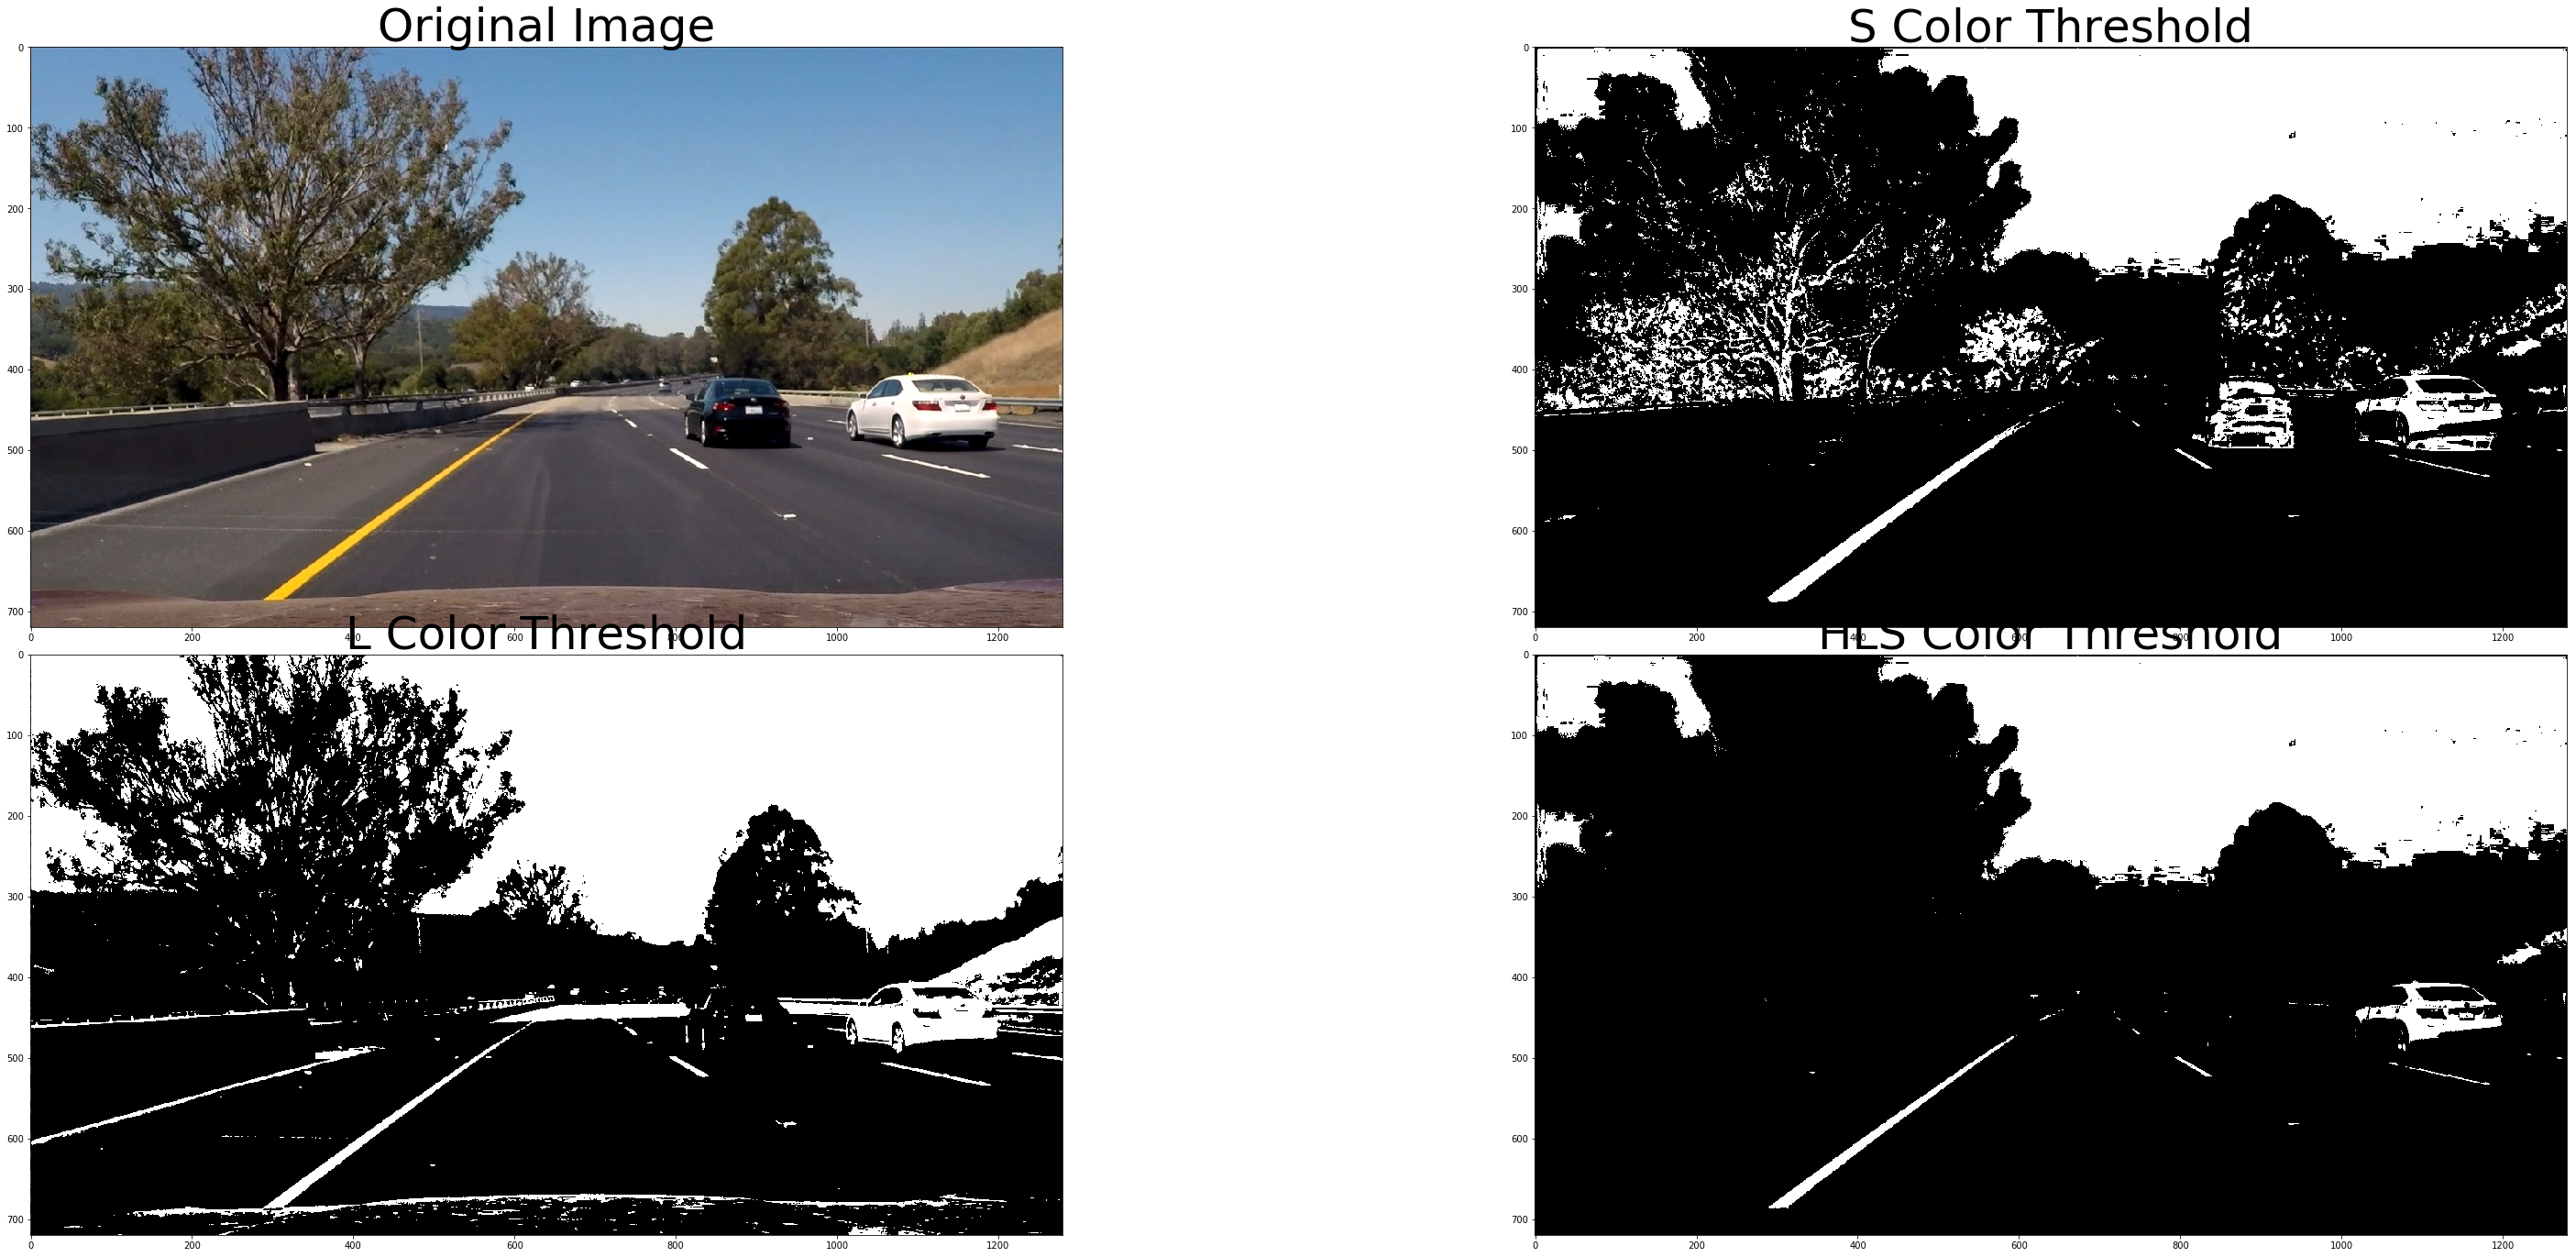

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Read in an image and grayscale it
image = mpimg.imread('HLS Color Threshold.jpg')

# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
def hls_thresh(img, thresh=(0, 255)):

    
    hls=cv2.cvtColor(img, cv2.COLOR_RGB2HLS) 
    L=hls[:,:,1]
    S=hls[:,:,2]
    lbinary_output=np.zeros_like(L)
    sbinary_output=np.zeros_like(S)
    lbinary_output[(L<255) & (L>120)]=1
    sbinary_output[(S<=thresh[1]) & (S>thresh[0])]=1
    binary_output = np.zeros_like(L)
    binary_output[(lbinary_output == 1) & (sbinary_output == 1)] = 1
    return sbinary_output, lbinary_output, binary_output
    
# Run the function
s_binary, l_binary, hls_binary = hls_thresh(image, thresh=(100, 255))
# Plot the result
f, axes = plt.subplots(2, 2,  figsize=(45, 20))
f.tight_layout()
axes[0,0].imshow(image)
axes[0,0].set_title('Original Image', fontsize=50)
axes[0,1].imshow(s_binary, cmap='gray')
axes[0,1].set_title('S Color Threshold', fontsize=50)
axes[1,0].imshow(l_binary, cmap='gray')
axes[1,0].set_title('L Color Threshold', fontsize=50)
axes[1,1].imshow(hls_binary, cmap='gray')
axes[1,1].set_title('HLS Color Threshold', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Color and Gradient

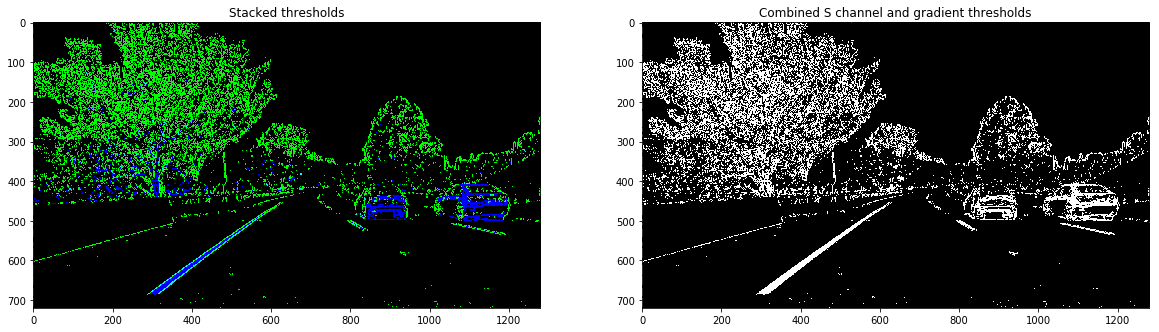

In [6]:
img = cv2.imread('HLS Color Threshold.jpg')
hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')

In [10]:
def luv_lab_filter(img, l_thresh=(195, 255), b_thresh=(140, 200), plot=False):
    
    l = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)[:, :, 0]
    l_bin = np.zeros_like(l)
    l_bin[(l >= l_thresh[0]) & (l <= l_thresh[1])] = 1

    b = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)[:, :, 2]
    b_bin = np.zeros_like(b)
    b_bin[(b >= b_thresh[0]) & (b <= b_thresh[1])] = 1
    
    color_binary = np.dstack(( np.zeros_like(l_bin), l_bin, b_bin)) * 255

    combine = np.zeros_like(l)
    combine[(l_bin == 1) | (b_bin == 1)] = 1

    return color_binary, combine

In [11]:
color_binary,combined_binary = luv_lab_filter(image, l_thresh=(215, 255), b_thresh=(145, 200))

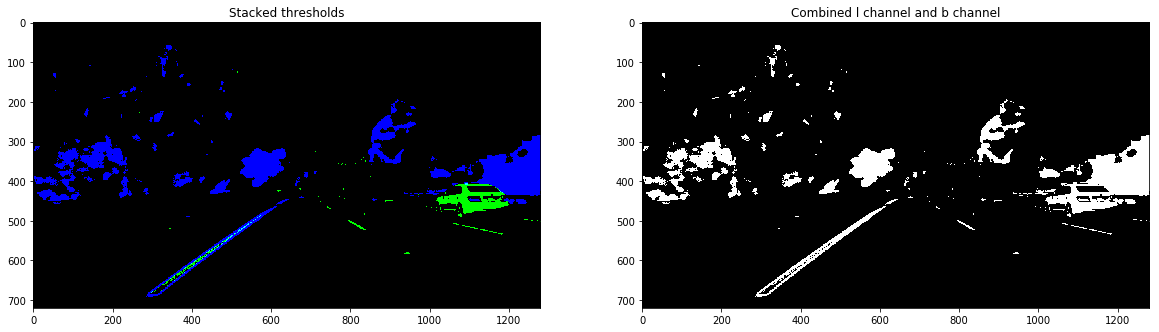

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined l channel and b channel')
ax2.imshow(combined_binary, cmap='gray')